# **Week 2 – Data Cleaning, Preprocessing & Exploratory Data Analysis (EDA)**

In this week, we prepare the dataset for modeling by performing cleaning, feature engineering, preprocessing, and deeper exploratory data analysis.

---

# Student Information
**Name: Vishal Baraiya**  
**Enrollment No.: 23010101014**  
**Roll No.: C3-635**  
**Course:** Machine Learning & Deep Learning Project  

---

# **Objectives**

By the end of this notebook, you will:

* Clean incorrect or unrealistic values
* Convert age from days → years
* Engineer new features (BMI)
* Scale numerical features
* Explore data relationships using visualizations
* Save cleaned dataset for Week 3 modeling

# **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# **2. Load Raw Dataset**

In [2]:
df = pd.read_csv("../data/raw/cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## **3. Convert Age from Days to Years**

### **Convert Age (days → years)**

Age is stored in days; convert it into more understandable units.

In [3]:
# Never modify raw data directly. Always keep original columns intact.
df['age_years'] = (df['age'] / 365).astype(int)
df[['age', 'age_years']].head()

,age,age_years
0,18393,50
1,20228,55
2,18857,51
3,17623,48
4,17474,47


## **4. Correct BP Values**

### **Fix unrealistic blood pressure values**

Some records in `ap_hi` (systolic BP) and `ap_lo` (diastolic BP) contain invalid or reversed values.

Rules:

* `ap_hi` ≥ `ap_lo`
* Remove extreme values

In [4]:
# Remove reversed BP values
df = df[df['ap_hi'] >= df['ap_lo']]

# Remove unrealistic BP values
df = df[(df['ap_hi'] > 50) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 200)]

## **5. Clean Height/Weight**

In [5]:
df = df[(df['height'] > 120) & (df['height'] < 220)]
df = df[(df['weight'] > 30) & (df['weight'] < 200)]

# **6. Feature Engineering**
### **Body Mass Index (BMI)**
A useful indicator for heart disease.

In [6]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df[['weight', 'height', 'bmi']].head()

,weight,height,bmi
0,62.0,168,21.967120
1,85.0,156,34.927679
2,64.0,165,23.507805
3,82.0,169,28.710479
4,56.0,156,23.011177


# **7. Preprocessing (Scaling Numeric Values)**

Machine learning models work better when numeric features are scaled.

We scale:

* age_years
* height
* weight
* ap_hi
* ap_lo
* bmi


In [7]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [8]:
import joblib
import os

os.makedirs("../models", exist_ok=True)
joblib.dump(scaler, "../models/scaler.pkl")
print("Scaler saved successfully at ../models/scaler.pkl")

Scaler saved successfully at ../models/scaler.pkl


# **8. Exploratory Data Analysis (EDA)**

Explore relationships between features and the target (`cardio`).
### **Distribution of Age and BMI by Target**

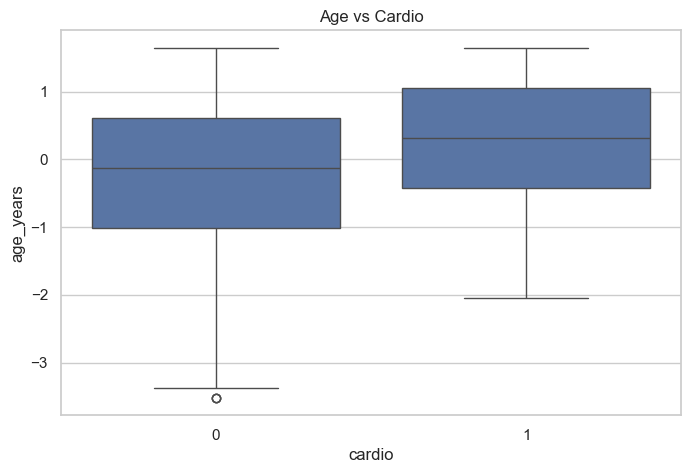

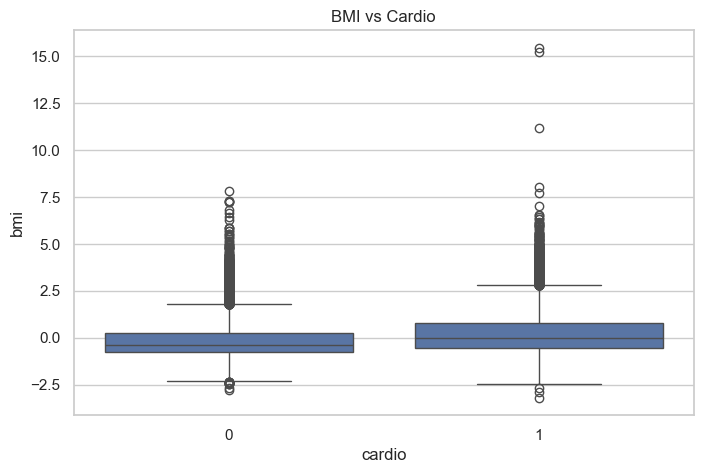

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cardio', y='age_years', data=df)
plt.title("Age vs Cardio")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='cardio', y='bmi', data=df)
plt.title("BMI vs Cardio")
plt.show()

# **9. Correlation Heatmap**

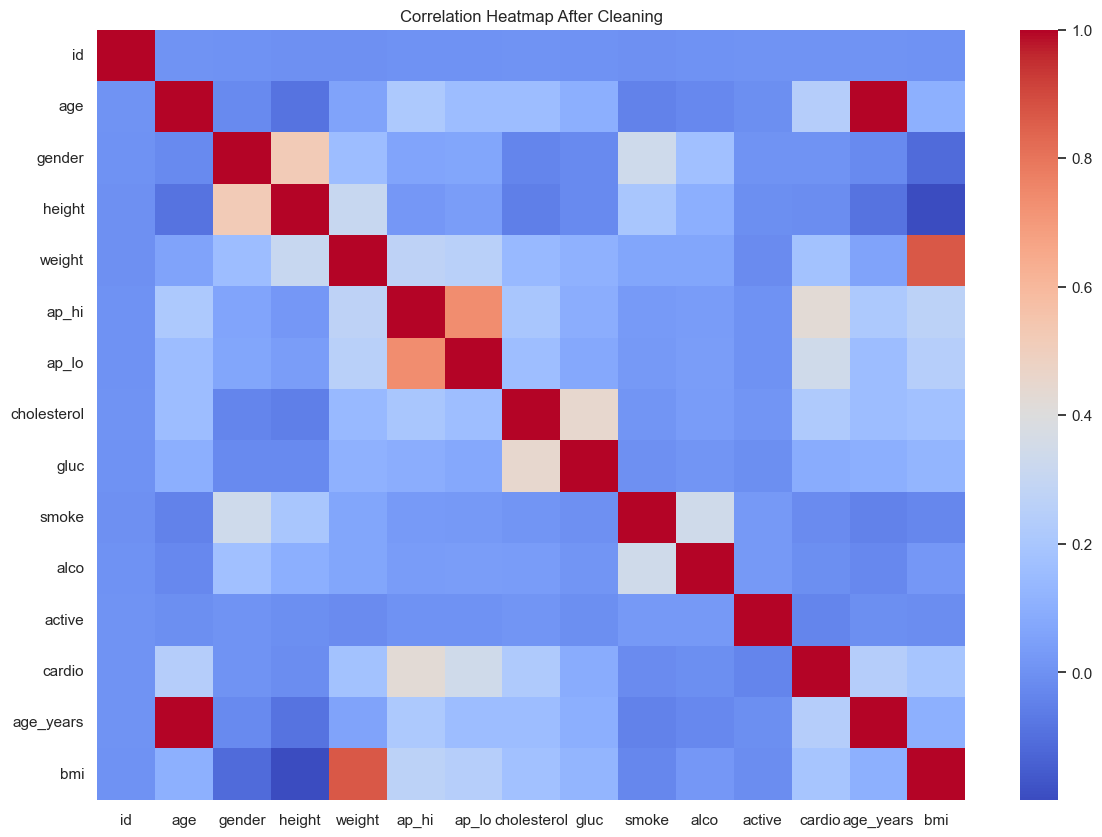

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Cleaning")
plt.show()

# **10. Countplots for Categorical Variables**

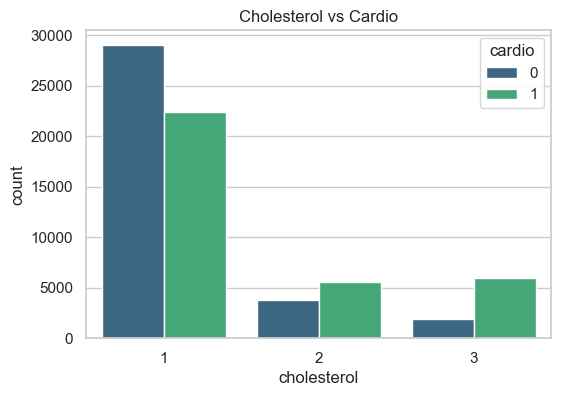

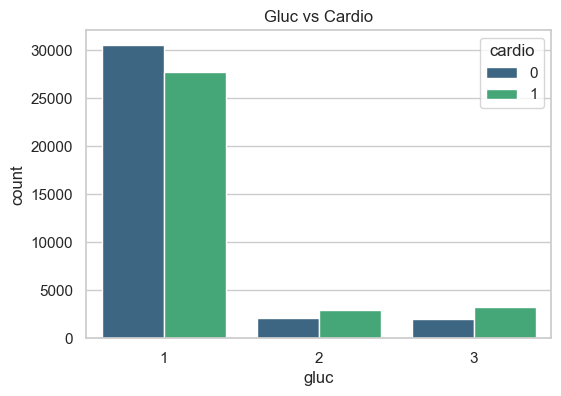

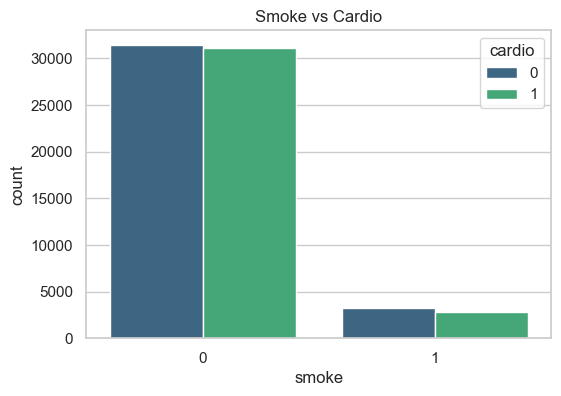

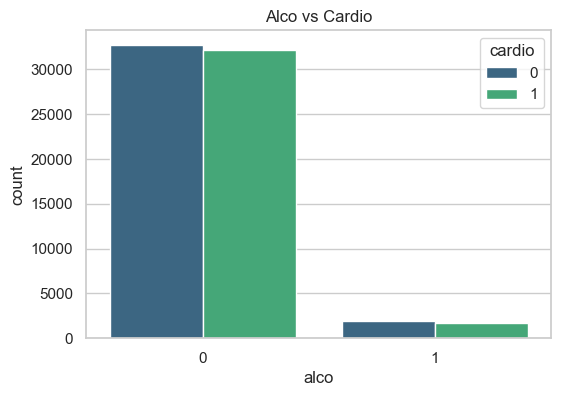

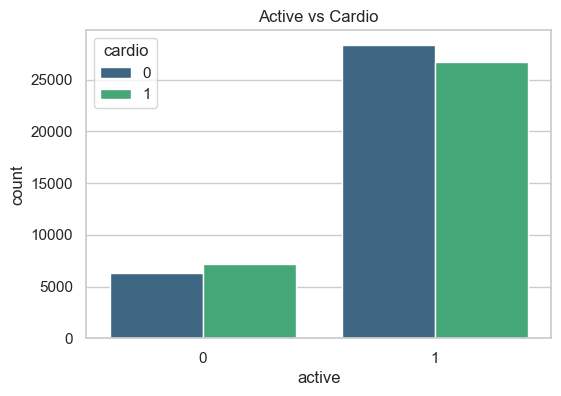

In [11]:
cat_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='cardio', palette='viridis')
    plt.title(f"{col.capitalize()} vs Cardio")
    plt.show()

# **11. Dataset Shape After Cleaning**

In [12]:
df.shape

(68581, 15)

# **12. Save Cleaned Dataset**

In [13]:
import os

os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/clean_cardio.csv", index=False)

print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


# **Week 2 Completed Successfully**

### ✔ Cleaned incorrect and unrealistic values

### ✔ Converted age → years

### ✔ Created BMI feature

### ✔ Scaled numerical columns

### ✔ Explored data using EDA plots

### ✔ Saved cleaned dataset for Week 3
